![alt text](Capture5.png "Title")

### <font color=red>1) Bayes Optimal Classifier</font> ###

__Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge.__

P(class|data) = (P(data|class) * P(class)) / P(data)

From a Bayesian perspective, we begin with some prior probability for some event, and we update this prior probability with new information to obtain a posterior probability.

Naive Bayes classifier assume that the effect of the value of a predictor (x) on a given class (c) is independent of the values of other predictors. This assumption is called class conditional independence. This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

Python libraries offer three kinds of Naïve Bayes classifiers:
* Gaussian: it assumes that features follow a normal distribution.
* Multinomial: it is used for discrete counts
* Bernoulli: the binomial model is useful if your feature vectors are binary (i.e. zeros and ones)

__Let's start with an example ...__

![alt text](Capture.png "Title")

##### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html ##### 
_______________________________________________________________________________________

In [1]:
# Step 1
# Import the essential libraries

from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
# Step 2
# Downloading the iris dataset

# iris.data              : Names of the columns
# iris.feature_names     : Target variable
# iris.target            : Target names
# iris.target_names      : name of target variable
    
iris              = datasets.load_iris()
class_names       = iris.target_names  
iris_df           = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

__Taking a look at our dataset ...__

In [3]:
iris_df.head(n = 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


__The method describe() gets a number of useful summaries for a dataset.__

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


![alt text](Capture6.png "Title")

__Now, we want to split our dataset into train and test sections__

In [5]:
from sklearn.model_selection import train_test_split

X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(type(X))

<class 'pandas.core.frame.DataFrame'>


__Here we use Gaussian Naive Bayes Classifier ...__

In [6]:
from sklearn.naive_bayes import GaussianNB   

clf = GaussianNB()  

# fitting the classifier
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

__We trained the model. Now, we want to test it ...__

In [7]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 86.7%


__Accuracy is not always the best metric to depend on, specially when the classes are not equally divided__

__A much better way to evaluate the performance of a classifier is to look at the <font color=red>confusion matrix</font>. Here, the idea is to count the number of times that samples are attributed to their own classes or to another class__

In [8]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

print(confusion_mtx)

[[10  0  0]
 [ 0  7  2]
 [ 0  2  9]]


##### <font color=red>You can use the following code for plotting a more understandable confusion matrix </font> #####

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center',
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     tick_marks = np.arange(len(classes))
    plt.xticks([0, 1, 2], ['January', 'February', 'March'],rotation=20)
    plt.yticks([-0.5, 0, 0.5, 1, 1.5, 2, 2.5], ['','January', '','February', '','March',''],
               rotation=0)
    
   

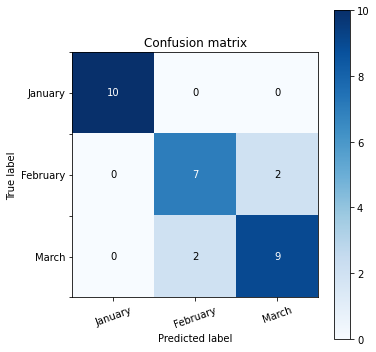

In [10]:
plot_confusion_matrix(confusion_mtx, class_names)



__By looking at the <font color=red>confusion matrix</font> above, we understand that:__
* In setosa samples, 10 out of 10 are classified correctly.
* In versicolor samples, 7 out of 9 are classified correctly.
* In virginica samples, 9 out of 11 are classified correctly.

__But what if you need a metric rather than a <font color=red>confusion matrix</font>?__

__There are other metrics which are used in different situations, such as:__
* Sensitivity (Recall)
* Specificity
* Precision
* F1-score
* AUROC

for more information, check out the link below:
##### https://medium.com/analytics-vidhya/notes-on-sensitivity-specificity-precision-recall-and-f1-score-e34204d0bb9b #####
_____________________________

In [11]:
# 1

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.78      0.78      0.78         9
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [12]:
# 2

FP = confusion_mtx.sum(axis=0) - np.diag(confusion_mtx)  
FN = confusion_mtx.sum(axis=1) - np.diag(confusion_mtx)
TP = np.diag(confusion_mtx)
TN = confusion_mtx.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)
print(TPR)

[1.         0.86666667 0.86666667]
[1.         0.77777778 0.81818182]


_____________________________________________________________________________

__How to reach a more rigid conclusion about our accuracy? Now, we have selected 20% of our dataset as our test section, which could be biased! In order to increase the validity of our results, *we can do a <font color=red>5-fold cross validation.</font>*__

In [13]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(acc)

[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


In [14]:
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))

Our accuracy is: 95.33% +- 2.67%


__<font color=green>Much better!</font>__

###  <font color=red>2) Minimum Distance Classifier</font> ###

![alt text](Capture3.png "Title")

__Let's start with an example ...__

![alt text](Capture.png "Title")

##### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html ##### 

In [15]:
# Step 1
# Import the essential libraries

from sklearn import datasets
import pandas as pd

In [16]:
# Step 2
# Downloading the iris dataset

# iris.data              : Names of the columns
# iris.feature_names     : Target variable
# iris.target            : Target names
# iris.target_names      : name of target variable
    
iris              = datasets.load_iris()
class_names       = iris.target_names  
iris_df           = pd.DataFrame(iris.data, columns=iris.feature_names)  
iris_df['target'] = iris.target

In [17]:
from sklearn.model_selection import train_test_split  

X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [18]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid(metric='euclidean')

# fitting the classifier
clf.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [19]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 70.0%


In [20]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

confusion_mtx

array([[10,  0,  0],
       [ 0,  4,  5],
       [ 1,  3,  7]])

##### <font color=red>You can use the following code for plotting a more understandable confusion matrix </font> #####

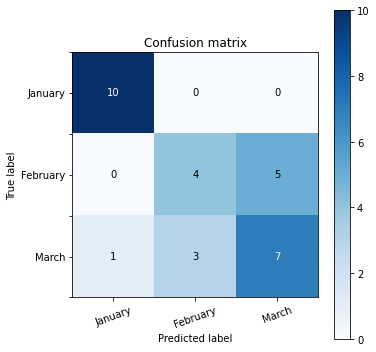

In [21]:
plot_confusion_matrix(confusion_mtx, class_names)

__Plot the decision boundary. 
For that, we will assign a color to each point in the mesh [x_min, x_max]*[y_min, y_max].__

In [22]:
from matplotlib.colors import ListedColormap

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [23]:
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()

x_train_min, x_train_max = X_train_array[:, 0].min() - 1, X_train_array[:, 0].max() + 1
y_train_min, y_train_max = X_train_array[:, 1].min() - 1, X_train_array[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_train_min, x_train_max, h),
                     np.arange(y_train_min, y_train_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

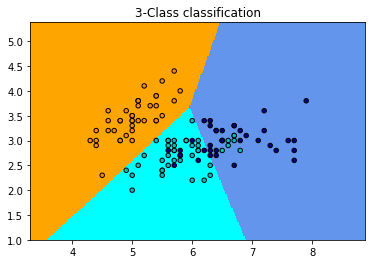

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')

plt.show()

In [25]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

x_test_min, x_test_max = X_test_array[:, 0].min() - 1, X_test_array[:, 0].max() + 1
y_test_min, y_test_max = X_test_array[:, 1].min() - 1, X_test_array[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_test_min, x_test_max, h),
                     np.arange(y_test_min, y_test_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

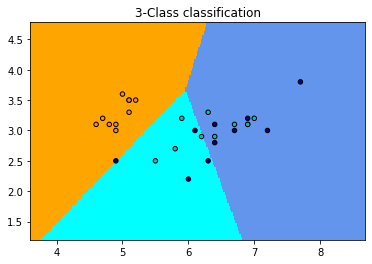

In [26]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')

plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(acc)

[0.73333333 0.86666667 0.76666667 0.86666667 0.9       ]


In [28]:
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))

Our accuracy is: 82.67% +- 6.46%


____________________________________________________________________________

# Question!

##### What if we selected <font color=red>Petal length and Petal width</font> as our features? Are they better features for this problem our not? #####

## _<font color=green>Report your answers.</font>_ ##

#### Analysing the above steps for Petal length and Petal width:

In [29]:
from sklearn.model_selection import train_test_split  

X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [30]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid(metric='euclidean')

# fitting the classifier
clf.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [31]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 93.3%


As can be seen the accuracy is increased. 

In [32]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

confusion_mtx

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  2,  9]])

It is obvious from the confucion matrix as well. 

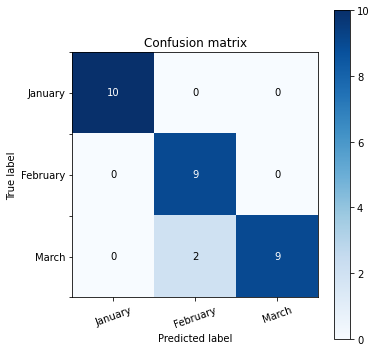

In [33]:
plot_confusion_matrix(confusion_mtx, class_names)

In [34]:
from matplotlib.colors import ListedColormap

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [35]:
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()

x_train_min, x_train_max = X_train_array[:, 0].min() - 1, X_train_array[:, 0].max() + 1
y_train_min, y_train_max = X_train_array[:, 1].min() - 1, X_train_array[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_train_min, x_train_max, h),
                     np.arange(y_train_min, y_train_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

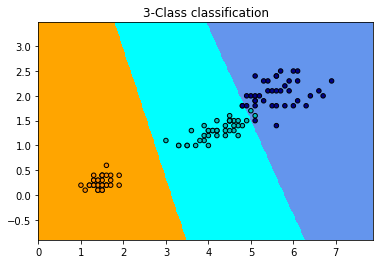

In [36]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')

plt.show()

In [37]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

x_test_min, x_test_max = X_test_array[:, 0].min() - 1, X_test_array[:, 0].max() + 1
y_test_min, y_test_max = X_test_array[:, 1].min() - 1, X_test_array[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_test_min, x_test_max, h),
                     np.arange(y_test_min, y_test_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

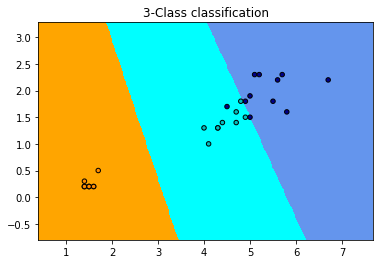

In [38]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')

plt.show()

As it is obvious in the above plot, the classes are more separated with these features than the ones analysed before. Therefore, the increased accuracy can be proved in this way as well. 

In [39]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(acc)

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [40]:
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))

Our accuracy is: 96.00% +- 2.49%
